<a href="https://colab.research.google.com/github/zjzsu2000/CMPE297_Sec49AdvanceDL/blob/master/Assignment_7/Extra_assignment_7_e)_sparkml_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extra_assignment_7_e) sparkml_Supervised_Machine_Learning

# To Explore Supervised Machine Learning

# Importing all libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading data

In [19]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Are there any missing value?
data.isna().sum()

Hours     0
Scores    0
dtype: int64

# Plotting the distribution of scores

In [6]:
data.shape

(25, 2)

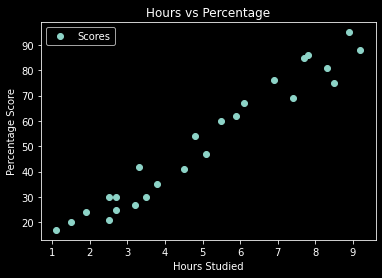

In [7]:
from matplotlib import style
style.use('dark_background')
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


# Preparing the data

In [8]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [9]:
# split data into train and tests sets
from sklearn.model_selection import train_test_split

# split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              test_size=0.2,
                                              random_state=0)

# Training the algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

print("Training is done.")

Training is done.


# Visualization

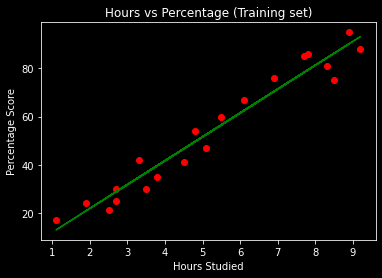

In [11]:
#plotting the regression line
line= lr.coef_*x+lr.intercept_

plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")

plt.title('Hours vs Percentage (Training set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Making predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
y_pred = lr.predict(x_test)

In [13]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


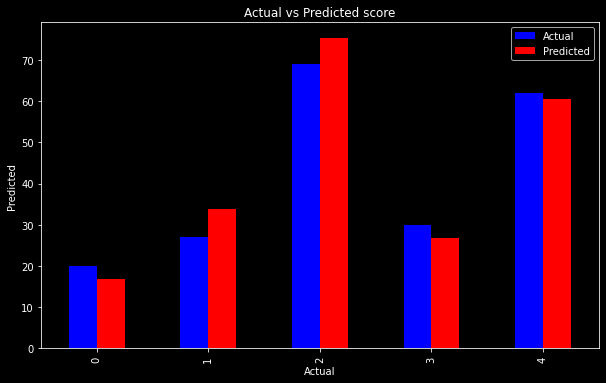

In [15]:
df.plot(kind='bar', figsize=(10,6), color=["blue", "red"])
plt.title('Actual vs Predicted score')  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.legend(["Actual", "Predicted"])
plt.show()

In [17]:

hours = 9.25
own_pred = lr.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Evaluating the model

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
